In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import nltk
import unicodedata
import re

import env

from wordcloud import WordCloud

In [34]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')

# Exercise 1

Spam Data

## Exercise 1a

Load the spam data set.

In [5]:
# read in spam data

df = pd.read_csv('spam_clean - spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exercise 1b

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [8]:
# create function to clean data
def clean(text):
    '''
    This function takes in a string and converts all characters to lowercase, normalizes them, removes special
    characters, and returns a string
    '''
    # convert to lowercase
    text = text.lower()
    # normalize
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # return anything that is a letter, number, single quote, or white space
    return re.sub(r"[^a-z0-9\s]", '', text)

In [9]:
# clean and create a single string of all messages by label
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [25]:
# split spam words and get top 50 bigrams
top50_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_spam_bigrams

(you, have)            73
(have, won)            54
(your, mobile)         49
(to, claim)            46
(please, call)         44
(this, is)             40
(won, a)               40
(to, contact)          37
(you, are)             35
(stop, to)             28
(cash, or)             27
(u, have)              27
(a, a2000)             25
(will, be)             25
(or, a)                25
(po, box)              24
(contact, u)           24
(to, receive)          23
(a1000, cash)          23
(guaranteed, call)     23
(for, your)            22
(prize, guaranteed)    22
(with, a)              22
(win, a)               21
(a, new)               21
(have, a)              21
(urgent, your)         20
(selected, to)         20
(contact, you)         20
(await, collection)    19
(attempt, to)          19
(send, stop)           19
(holiday, or)          19
(to, 8007)             19
(every, week)          19
(to, 86688)            19
(go, to)               19
(or, call)             18
(call, now) 

In [44]:
# split ham words and get top 50 bigrams
top50_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                       .head(50))

top50_ham_bigrams

(are, you)     173
(i, am)        132
(have, a)      110
(i, will)       98
(you, are)      91
(do, you)       91
(in, the)       86
(if, you)       83
(i, have)       83
(i, dont)       82
(want, to)      79
(going, to)     76
(i, was)        74
(in, a)         73
(i, can)        71
(and, i)        71
(have, to)      70
(but, i)        70
(to, be)        66
(to, get)       65
(i, cant)       63
(on, the)       61
(need, to)      60
(will, be)      58
(if, u)         57
(call, me)      56
(i, think)      56
(for, the)      55
(i, need)       55
(i, want)       54
(you, know)     53
(i, love)       50
(to, do)        50
(when, i)       49
(so, i)         49
(a, great)      49
(you, want)     49
(i, got)        48
(to, you)       47
(to, go)        47
(ill, call)     47
(can, you)      47
(you, have)     45
(i, know)       44
(if, i)         44
(you, can)      44
(see, you)      43
(you, in)       43
(to, come)      43
(of, the)       42
dtype: int64

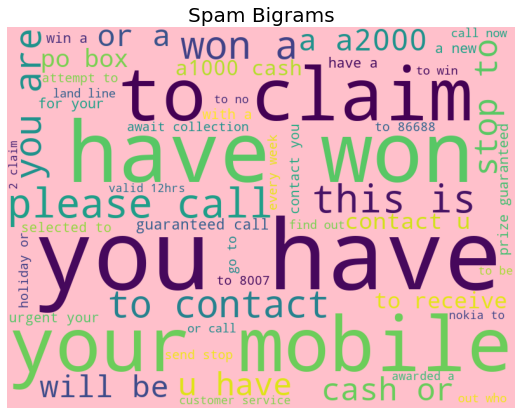

In [55]:
# create wordcloud of top 50 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top50_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='pink', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Spam Bigrams',size=20)
plt.show()

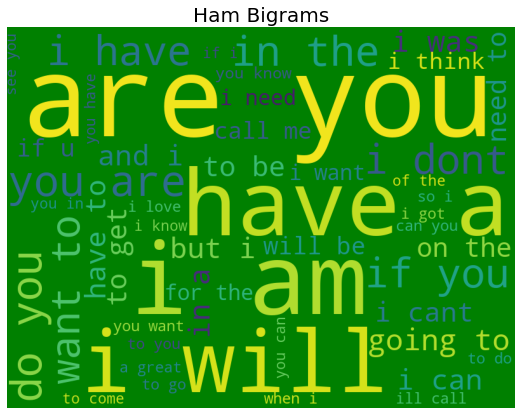

In [54]:
# create wordcloud of top 50 ham bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top50_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='green', width=800, height=600).generate_from_frequencies(data)
plt.imshow(img)
plt.axis('off')
plt.title('Ham Bigrams',size=20)
plt.show()

### Takeaways

* Spam messages are all about 'you' and 'your'
* Spam messages contain a lot of words with positive connotations (win, won, claim, prize, cash, etc.)
* Ham messages are all about 'you' and 'I'
* Ham messages are more neutral and contain more filler words

## Exercise 1c

Is there any overlap in the bigrams for the spam data and the ham data?

In [72]:
# use sets to find the intersection of spam and hap
overlap = set.intersection(set(top50_spam_bigrams.keys()), set(top50_ham_bigrams.keys()))
overlap

{('have', 'a'), ('to', 'be'), ('will', 'be'), ('you', 'are'), ('you', 'have')}

### There is a little overlap in the bigrams for these two message types and it makes sense that two of these contain the word 'you' and also that two contain the word 'have'

## Exercise 1d

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [73]:
# split spam words and get top 20 trigrams
top20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_spam_trigrams

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(urgent, your, mobile)       18
(to, contact, u)             18
(to, contact, you)           16
(from, land, line)           16
(valid, 12hrs, only)         16
(account, statement, for)    16
(cash, or, a)                15
(is, the, 2nd)               15
(this, is, the)              15
(trying, to, contact)        15
(draw, shows, that)          14
(we, are, trying)            14
(land, line, claim)          14
(shows, that, you)           14
(reply, or, call)            14
(are, trying, to)            14
dtype: int64

In [74]:
# split ham words and get top 20 trigrams
top20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                       .head(20))

top20_ham_trigrams

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
(have, a, great)      25
(i, miss, you)        24
(i, love, you)        23
(hope, you, are)      20
(i, have, to)         20
(give, me, a)         19
(i, dont, know)       19
(happy, new, year)    18
(a, great, day)       17
(do, have, a)         17
(u, wan, 2)           16
(what, are, you)      16
(i, will, be)         16
(you, want, to)       16
(on, the, way)        16
dtype: int64

Text(0.5, 1.0, 'Top Spam Trigrams')

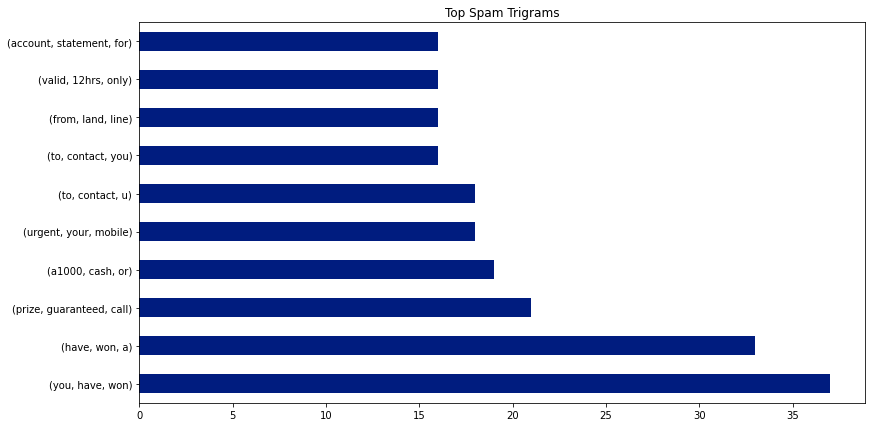

In [91]:
# plot only the top 10 spam trigrams
top20_spam_trigrams.head(10).plot.barh()
plt.title('Top Spam Trigrams')

Text(0.5, 1.0, 'Top Ham Trigrams')

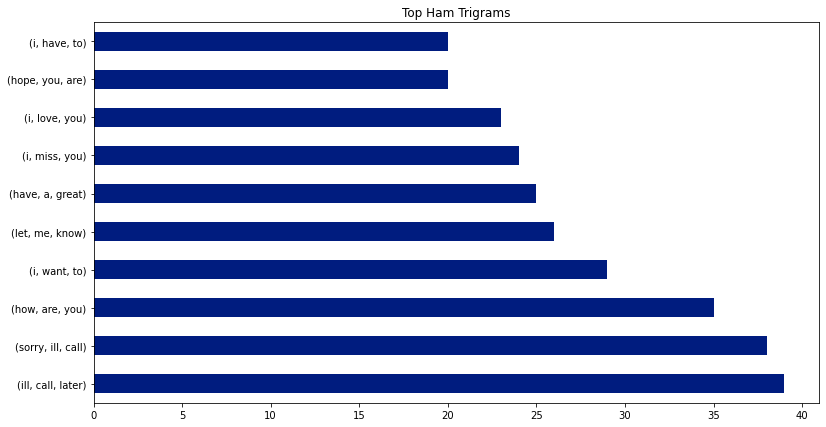

In [92]:
# plot only the top 10 ham trigrams
top20_ham_trigrams.head(10).plot.barh()
plt.title('Top Ham Trigrams')